Analizemos la dependencia del motifs recíproco con la calidad del aprendizaje


Empezemos con los archivos de prueba 5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#Paso los archivos con los pesos a matrices

def csv_to_matrix(filename):
    df = pd.read_csv(filename, header=None) 
    matrix = df.values 
    return matrix

#quiero usar los mismos colores para los distintos valores de pqif

pqif_vector = [0, 0.5, 1]
colores = ['r', 'g', 'b']

In [4]:
def motifs(w,N):
    
    w=w-np.mean(w)
    
    ww=np.matmul(w,w)
    wtw=np.matmul(w.T,w)
    wwt=np.matmul(w,w.T)
    
    sigma2=np.trace(wwt)/N
    
    tau_rec=np.trace(ww)
    tau_rec/=sigma2*N
    
    tau_div=np.sum(wwt)-np.trace(wwt)
    tau_div/=sigma2*N*(N-1)
    
    tau_con=np.sum(wtw)-np.trace(wtw)
    tau_con/=sigma2*N*(N-1)
    
    tau_chn=2*(np.sum(ww)-np.trace(ww))
    tau_chn/=sigma2*N*(N-1)
    
    return sigma2,tau_rec,tau_div,tau_con,tau_chn


In [5]:
def cargar_archivo_parametros(filename_parametros):
    # Lee el archivo CSV
    df = pd.read_csv(filename_parametros)
    
    # Convierte el DataFrame a un diccionario de Python
    parametros = df.to_dict(orient='records')[0]
    
    # Retorna el diccionario de parámetros
    return parametros



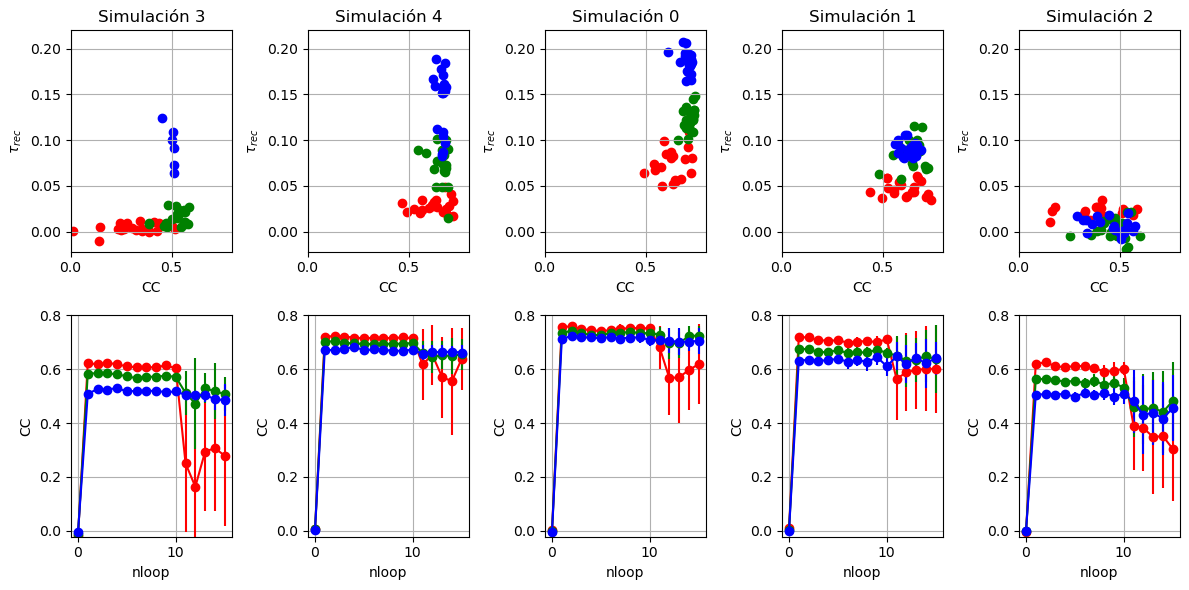

In [128]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))  # Modifica el tamaño aquí según sea necesario
nums_sim = [3, 4, 0,1,2]

for index in range(len(nums_sim)):
    num_sim = nums_sim[index]
    nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
    nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
    filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')  # Reemplaza 'simulacion_1_parametros.csv' con el nombre real de tu archivo CSV
    parametros = cargar_archivo_parametros(filename_parametros)

    # Ahora puedes acceder a los parámetros como lo harías normalmente
    N = parametros['N']
    nloop = parametros['nloop']
    nloop_train = 10
    cant_seed = parametros['cant_seed']
    gsyn = parametros['gsyn']

    # Crear una figura más pequeña con dos plots separados, cada uno con tres subplots


    # Obtener los valores únicos de 'pqif'
    pqif_values = data['pqif'].unique()

    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]
        
        # Seleccionar los datos de los loops desde 10 hasta nloop-1 para el valor actual de 'pqif'
        df_loops = data[(data['pqif'] == pqif_value) & (data['nloop'] >= 10) & (data['nloop'] < nloop)]

        # Calcular el promedio de cc y tau_rec para los datos seleccionados
        mean_cc = df_loops.groupby(['seed']).mean().reset_index()

        # Graficar el scatter plot y la línea de promedio
        axs[0, index].scatter(mean_cc['cc'], mean_cc['tau_rec'], label=f'pqif={pqif_value}', color=color)
    

    # Ajustar el diseño de los subplots
    axs[0, index].set_xlim(0, 0.8)
    axs[0, index].grid()
    axs[0, index].set_xlabel('CC')
    axs[0, index].set_ylabel(r'$\tau_{rec}$')
    axs[0, index].set_title(f'Simulación {num_sim}')
    axs[0, index].set_ylim(-0.022, 0.22)

    # Iterar sobre los valores únicos de 'pqif' para graficar todas las líneas en el subplot actual
    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]
        # Filtrar los datos para el valor actual de 'pqif'
        data_pqif = data[(data['pqif'] == pqif_value) ]

        # Calcular el promedio y la desviación estándar para cada combinación de 'nloop' y 'columna'
        grouped_data = data_pqif.groupby(['nloop'])
        for columna in ['cc']:
            grouped_column_data = grouped_data[columna].agg(['mean', 'std']).reset_index()

            # Graficar cc vs nloop para cada 'pqif' con barras de error
            axs[1, index].errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label=f'pqif={pqif_value}', color = color, fmt='-o')
            
        # Agregar leyenda al subplot actual


    # Ajustar el diseño de los subplots
    axs[1, index].grid()
    axs[1, index].set_xlabel('nloop')
    axs[1, index].set_ylabel('CC')
    axs[1, index].set_ylim(-0.022, 0.8)

    #axs[1, num_sim].set_ylim(0.5, 0.775)
# Ajustar los subplots para evitar solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()

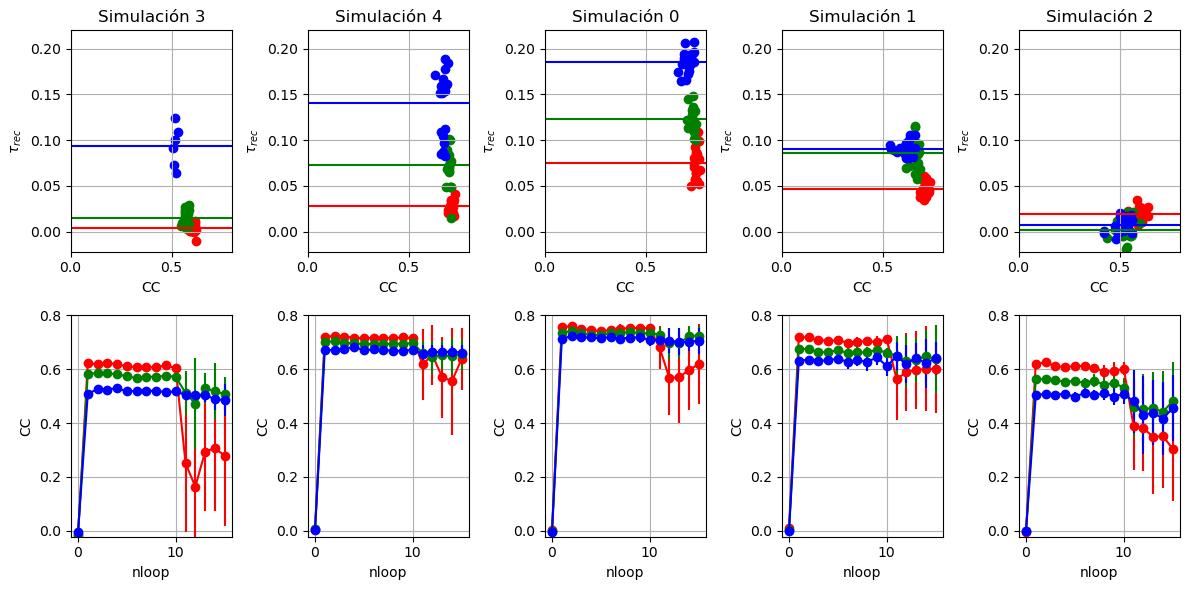

In [151]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))  # Modifica el tamaño aquí según sea necesario
nums_sim = [3, 4, 0,1,2]

for index in range(len(nums_sim)):
    num_sim = nums_sim[index]
    nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
    nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
    filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')  # Reemplaza 'simulacion_1_parametros.csv' con el nombre real de tu archivo CSV
    parametros = cargar_archivo_parametros(filename_parametros)

    # Ahora puedes acceder a los parámetros como lo harías normalmente
    N = parametros['N']
    nloop = parametros['nloop']
    nloop_train = 10
    cant_seed = parametros['cant_seed']
    gsyn = parametros['gsyn']

    # Crear una figura más pequeña con dos plots separados, cada uno con tres subplots


    # Obtener los valores únicos de 'pqif'
    pqif_values = data['pqif'].unique()
    df_nloop = data[(data['nloop'] == 10)]

    # Iterar sobre los valores únicos de 'pqif' para graficar todas las líneas en el subplot actual
    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]
        axs[0, index].scatter(df_nloop[df_nloop['pqif'] == pqif_value]['cc'], df_nloop[df_nloop['pqif'] == pqif_value]['tau_rec'], label=f'pqif={pqif_value}', color=color)
        axs[0, index].axhline(np.mean(df_nloop[df_nloop['pqif'] == pqif_value]['tau_rec']), color = color)

    

    # Ajustar el diseño de los subplots
    axs[0, index].set_xlim(0, 0.8)
    axs[0, index].grid()
    axs[0, index].set_xlabel('CC')
    axs[0, index].set_ylabel(r'$\tau_{rec}$')
    axs[0, index].set_title(f'Simulación {num_sim}')
    axs[0, index].set_ylim(-0.022, 0.22)

    # Iterar sobre los valores únicos de 'pqif' para graficar todas las líneas en el subplot actual
    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]
        # Filtrar los datos para el valor actual de 'pqif'
        data_pqif = data[(data['pqif'] == pqif_value) ]

        # Calcular el promedio y la desviación estándar para cada combinación de 'nloop' y 'columna'
        grouped_data = data_pqif.groupby(['nloop'])
        for columna in ['cc']:
            grouped_column_data = grouped_data[columna].agg(['mean', 'std']).reset_index()

            # Graficar cc vs nloop para cada 'pqif' con barras de error
            axs[1, index].errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label=f'pqif={pqif_value}', color = color, fmt='-o')
            
        # Agregar leyenda al subplot actual


    # Ajustar el diseño de los subplots
    axs[1, index].grid()
    axs[1, index].set_xlabel('nloop')
    axs[1, index].set_ylabel('CC')
    axs[1, index].set_ylim(-0.022, 0.8)

    #axs[1, num_sim].set_ylim(0.5, 0.775)
# Ajustar los subplots para evitar solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()

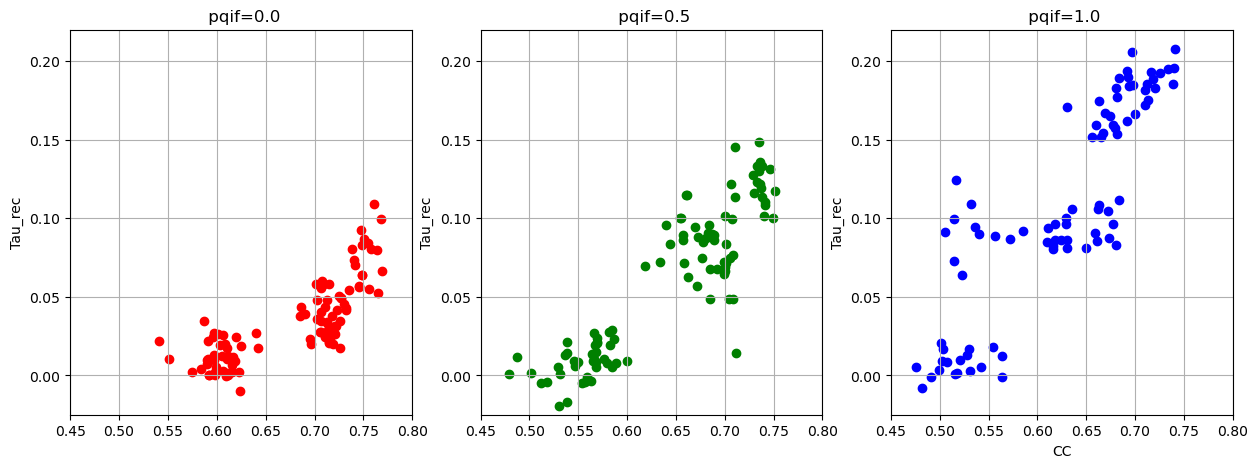

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Obtener los colores para cada valor único de 'pqif'
colores = ['r', 'g', 'b']
fig, axs = plt.subplots(1, len(pqif_values), figsize=(15, 5), sharex=True)
# Iterar sobre cada simulación
for num_sim in [3, 4, 0, 1, 2]:
    nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_9 = data[data['nloop'] == 10]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_9['pqif'].unique()

    # Crear una figura para esta simulación
    

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_9[data_nloop_9['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        # Graficar tau_rec vs cc para este valor de 'pqif'
        axs[i].scatter(cc_values, tau_rec_values, label=f'pqif={pqif_value}', color=colores[i])
        axs[i].set_title(f' pqif={pqif_value}')

        # Añadir etiquetas solo al eje y del último subplot
        if i == len(pqif_values) - 1:
            axs[i].set_xlabel('CC')
        axs[i].set_ylabel('Tau_rec')

        # Ajustar el diseño del subplot
        axs[i].grid(True)
        axs[i].set_xlim(0.45, 0.8)
        axs[i].set_ylim(-0.025, 0.22)
        



    # Mostrar la figura
plt.show()





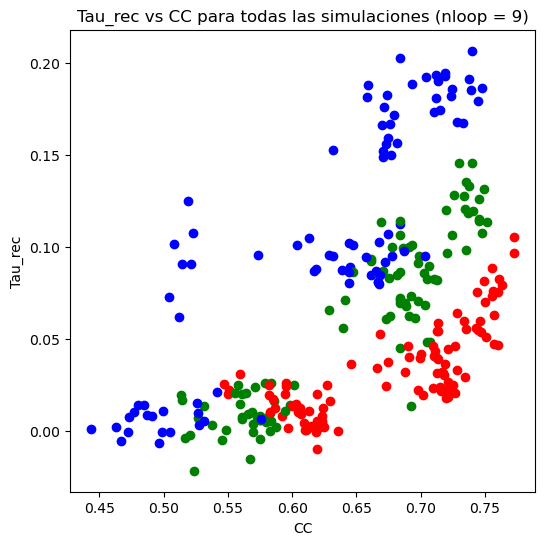

In [157]:

colores = ['r', 'g', 'b']

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(6, 6))

# Iterar sobre cada simulación
for num_sim in [3, 4, 0, 1, 2]:
    nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Filtrar los datos para nloop = 9
    data_nloop_9 = data[data['nloop'] == 9]

    # Obtener los valores únicos de 'pqif' para esta simulación
    pqif_values = data_nloop_9['pqif'].unique()

    # Iterar sobre cada valor único de 'pqif'
    for i, pqif_value in enumerate(pqif_values):
        # Filtrar los datos para este valor de 'pqif'
        data_pqif = data_nloop_9[data_nloop_9['pqif'] == pqif_value]

        # Obtener los valores de tau_rec y cc para este valor de 'pqif'
        tau_rec_values = data_pqif['tau_rec']
        cc_values = data_pqif['cc']

        # Graficar tau_rec vs cc para este valor de 'pqif' con color correspondiente
        ax.scatter(cc_values, tau_rec_values, label=f'Simulación {num_sim}, pqif={pqif_value}', color=colores[i])

# Añadir etiquetas y título al gráfico
ax.set_xlabel('CC')
ax.set_ylabel('Tau_rec')
ax.set_title('Tau_rec vs CC para todas las simulaciones (nloop = 9)')



# Mostrar el gráfico
plt.show()


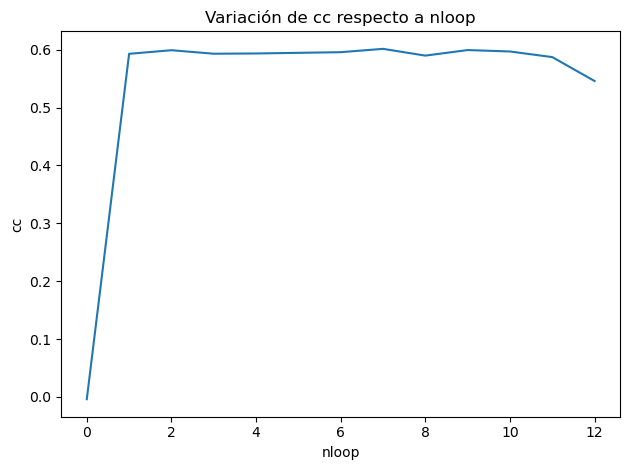

In [126]:

# Definir el tamaño de la figura
num_sim = 5
nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
data = pd.read_csv(nombre_archivo)

# Crear la figura y los subplots
fig, ax = plt.subplots()

# Graficar los datos
ax.plot(data['nloop'], data['cc'])

# Añadir etiquetas y título
ax.set_xlabel('nloop')
ax.set_ylabel('cc')
ax.set_title('Variación de cc respecto a nloop')

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la figura
plt.show()

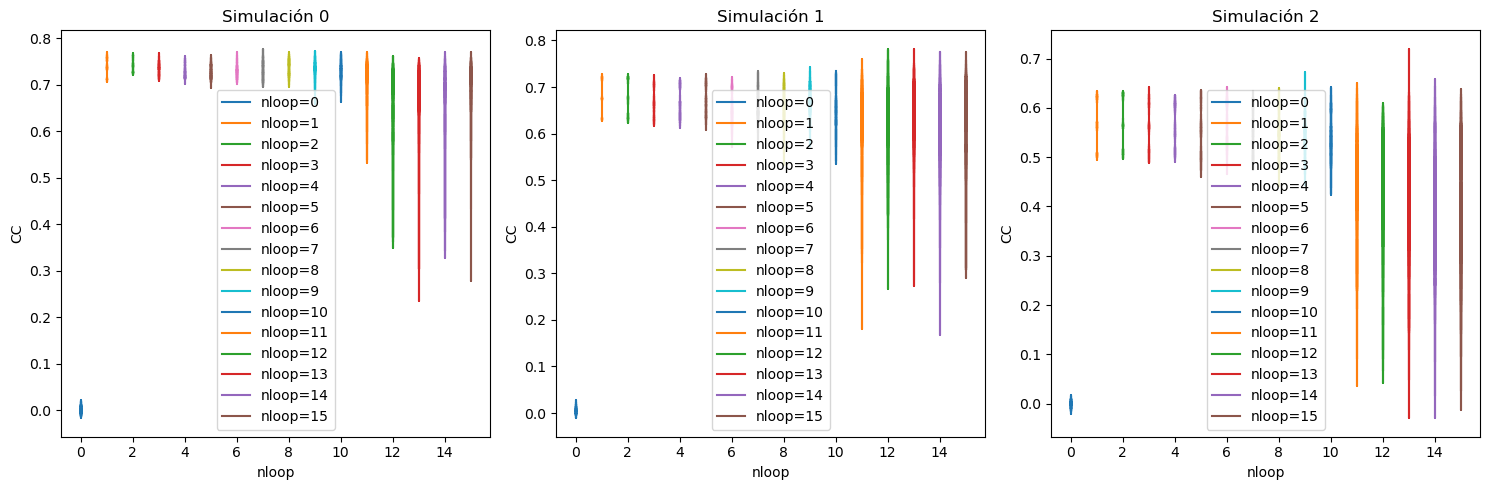

In [115]:
# Definir el tamaño de la figura
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bucle sobre las simulaciones
for num_sim in range(3):
    nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
    nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
    filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')  # Reemplaza 'simulacion_1_parametros.csv' con el nombre real de tu archivo CSV
    parametros = cargar_archivo_parametros(filename_parametros)

    # Ahora puedes acceder a los parámetros como lo harías normalmente
    N = parametros['N']
    nloop = parametros['nloop']
    cant_seed = parametros['cant_seed']
    gsyn = parametros['gsyn']

    # Agrupar los datos por 'nloop'
    grouped_data = data.groupby('nloop')

    # Iterar sobre cada grupo y graficar los datos de cc para cada semilla
    for nloop_value, group in grouped_data:
        axs[num_sim].plot(group['nloop'], group['cc'], label=f'nloop={nloop_value}')

    # Configurar las etiquetas y título del gráfico
    axs[num_sim].set_xlabel('nloop')
    axs[num_sim].set_ylabel('CC')
    axs[num_sim].set_title(f'Simulación {num_sim}')
    axs[num_sim].legend()

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()



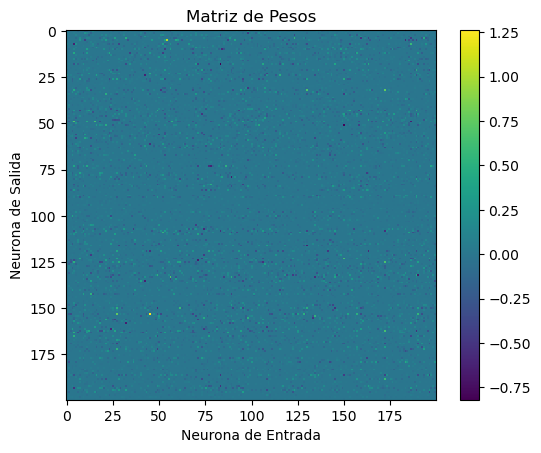

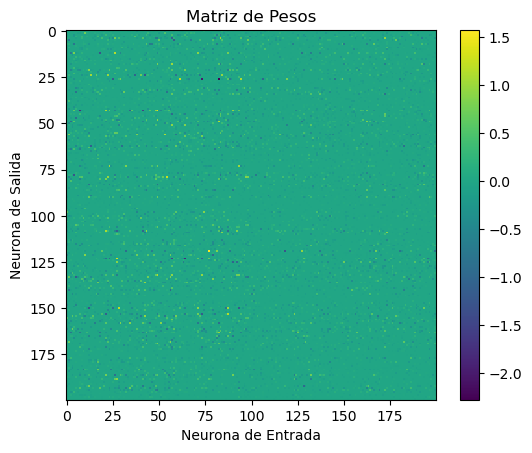

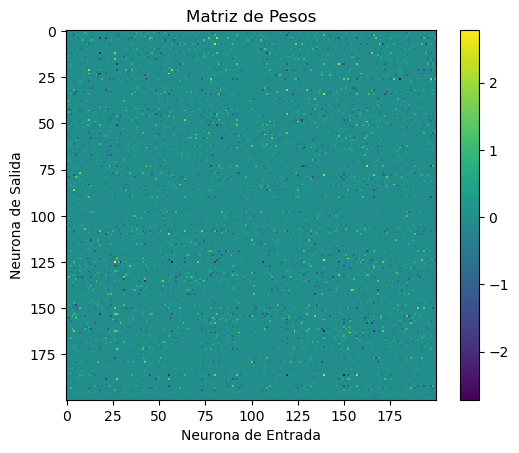

In [8]:
for i in range(len(pqif_vector)):
    pqif = pqif_vector[i]
    filename = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_0"
    weights_matrix = csv_to_matrix(filename)
    plt.imshow(weights_matrix, cmap='viridis', interpolation='nearest')

    # Añadir barra de color para representar los valores de los pesos
    plt.colorbar()

    # Añadir título y etiquetas de los ejes
    plt.title('Matriz de Pesos')
    plt.xlabel('Neurona de Entrada')
    plt.ylabel('Neurona de Salida')

    # Mostrar la gráfica
    plt.show()

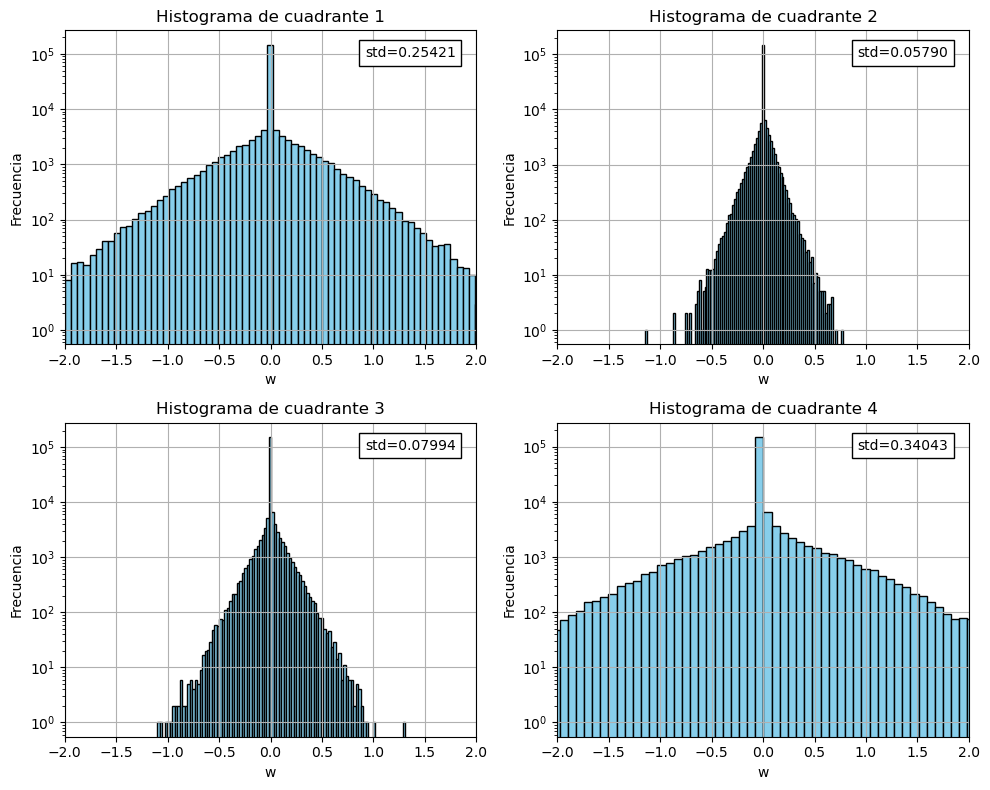

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for m, ax in enumerate(axes.flatten()):
    # Concatenar todas las matrices del cuadrante en una sola matriz
    cuadrante_combined = np.concatenate(cuadrantes[m])
    

    # Construir el histograma en el subplot correspondiente
    counts, bins = np.histogram(cuadrante_combined.flatten(), bins=100)
    std = np.std(cuadrante_combined.flatten())
    text_x = 0.95
    text_y = 0.95
    ax.text(text_x, text_y, f"std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

    ax.hist(bins[:-1], bins, weights=counts, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma de cuadrante {m+1}')
    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    ax.set_xlim(-2,2)
    ax.grid(True)

plt.tight_layout()
plt.show()


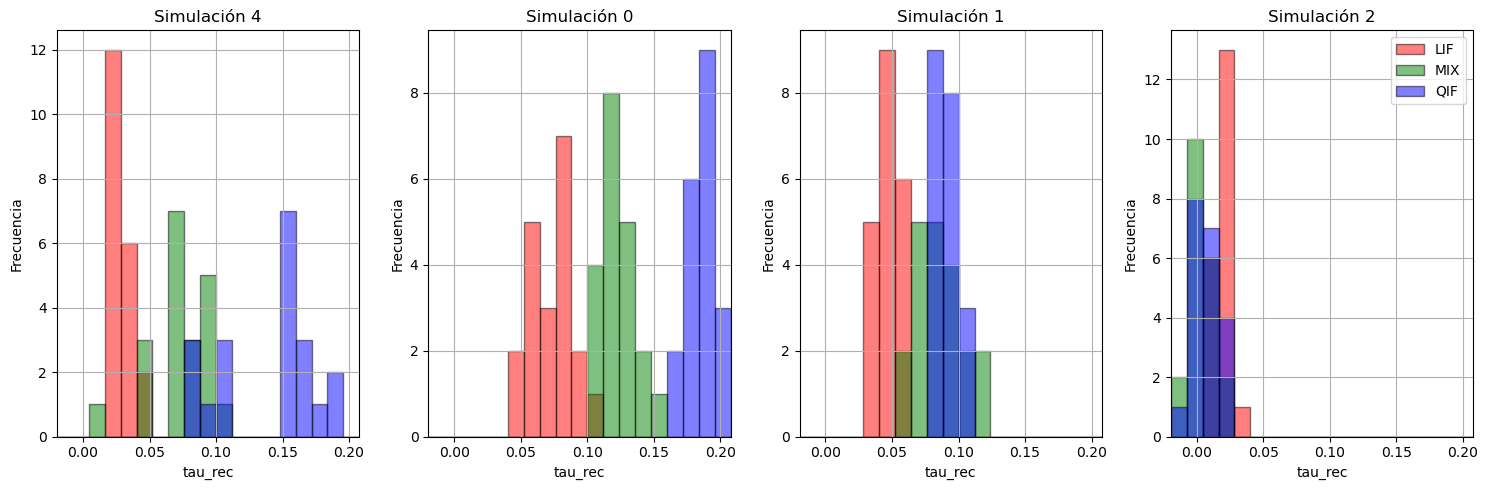

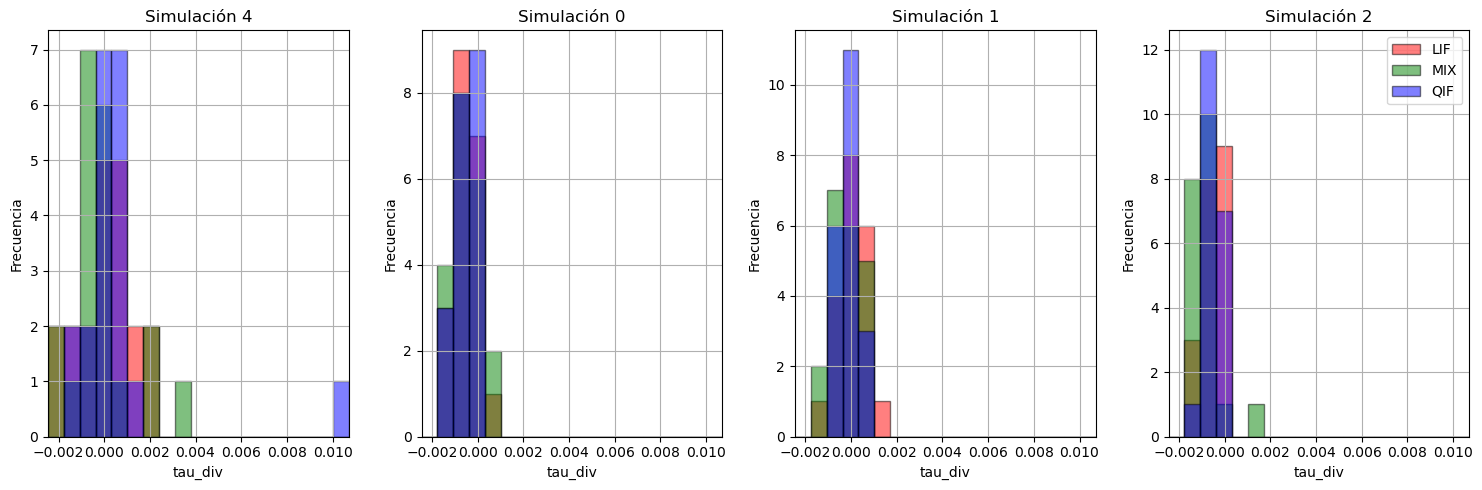

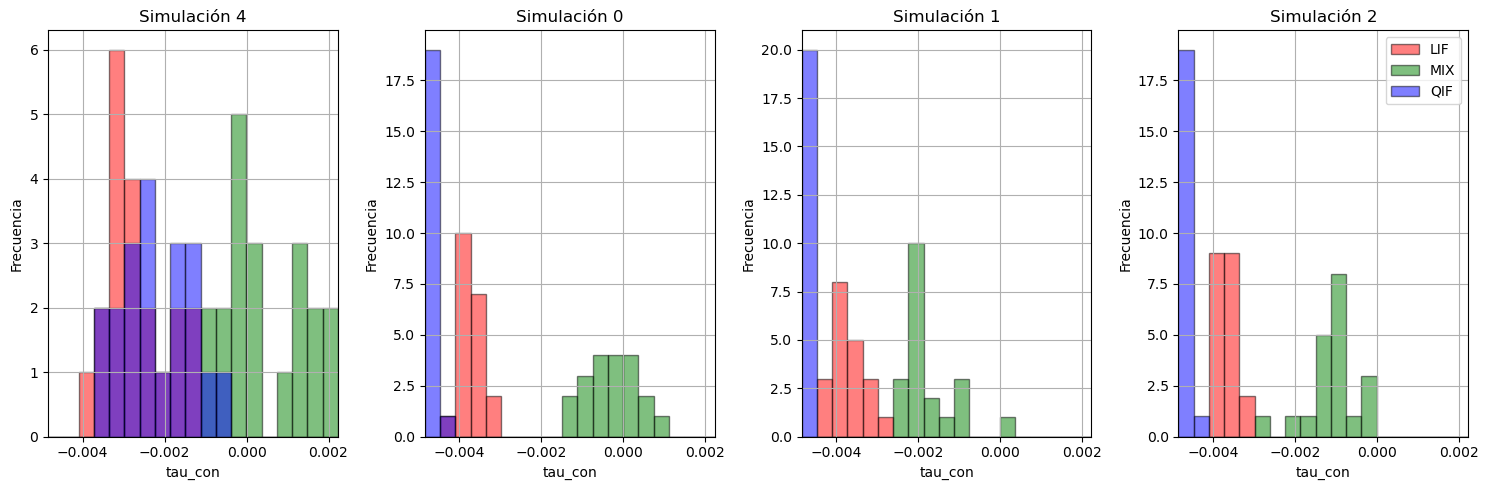

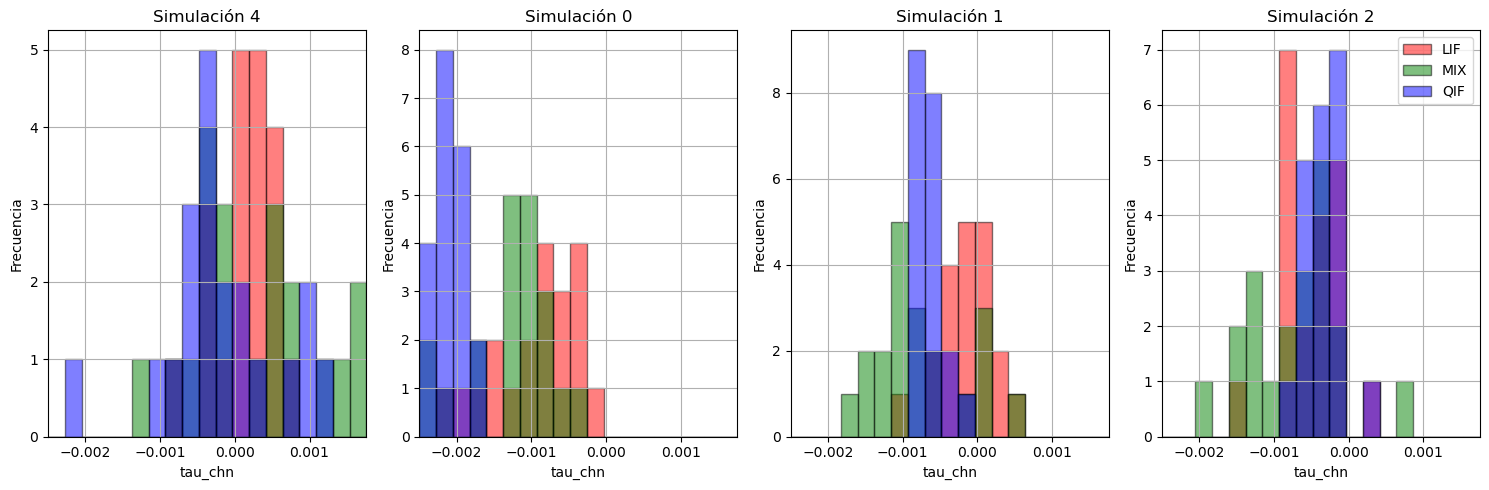

In [43]:
tau_vect = ['tau_rec','tau_div','tau_con','tau_chn']
num_sims = [4,0,1,2]
for tau in tau_vect:

    min_val_all = np.inf
    max_val_all = -np.inf

    for j in range(len(num_sims)):
        num_sim = num_sims[j]
        nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)

        # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
        nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"
        filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')
        parametros = cargar_archivo_parametros(filename_parametros)

        # Ahora puedes acceder a los parámetros como lo harías normalmente
        N = parametros['N']
        nloop = parametros['nloop']
        cant_seed = parametros['cant_seed']

        df_nloop = data[(data['nloop'] == (nloop - 1))]
        min_val = np.min(df_nloop[tau])
        max_val = np.max(df_nloop[tau])
        min_val_all = min(min_val_all, min_val)
        max_val_all = max(max_val_all, max_val)

    num_bins = 20
    bins = np.linspace(min_val_all, max_val_all, num_bins)

    # Configurar subplots
    fig, axs = plt.subplots(1, len(num_sims), figsize=(15, 5))
    colores = ['r', 'g', 'b']

    # Generar los histogramas con los bins definidos
    for i in range(len(num_sims)):
        num_sim = num_sims[i]
        nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)

        nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"
        filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')
        parametros = cargar_archivo_parametros(filename_parametros)

        N = parametros['N']
        nloop = parametros['nloop']
        cant_seed = parametros['cant_seed']

        df_nloop = data[(data['nloop'] == (nloop - 1))]

        for pq, pqif in enumerate(pqif_vector):
            color = colores[pq]
            label = ''
            if pqif == 0:
                label = 'LIF'
            elif pqif == 0.5:
                label = 'MIX'
            elif pqif == 1:
                label = 'QIF'
            df_nloop_pqif = df_nloop[(df_nloop['pqif'] == pqif)]
            axs[i].hist(df_nloop_pqif[tau], bins, edgecolor='black', label= label, color=color, alpha=0.5)
            axs[i].grid()
            axs[i].set_title(f'Simulación {num_sim}')
            axs[i].set_xlabel(tau)
            axs[i].set_ylabel('Frecuencia')
            axs[i].set_xlim(min_val_all, max_val_all)

    # Agregar una única leyenda en el gráfico de la derecha
    axs[-1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()



Text(0.5, 1.0, 'Subpoblaciones QIF LIF en el sistema MIX')

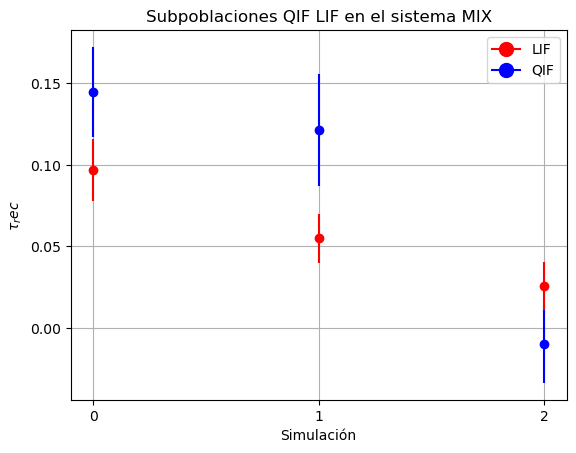

In [12]:
# Inicializar diccionarios para almacenar los valores de tau_rec para cada cuadrante, simulación y valor de pqif
simulations = [0,1,2]
tau_rec_cuadrante1 = {sim: {} for sim in range(3)}
tau_rec_cuadrante4 = {sim: {} for sim in range(3)}

# Bucle sobre las simulaciones
for num_sim in range(3):
    pqif = 0.5

    # Inicializar listas para almacenar los valores de tau_rec para cada semilla
    tau_rec1_list = []
    tau_rec4_list = []

    # Bucle sobre las semillas
    for k in range(cant_seed):
        matrix= csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')

        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2

        cuadrante1 = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
        cuadrante4 = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho
        
        # Calcular tau_rec para cada cuadrante
        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)

        # Guardar los valores de tau_rec para cada cuadrante
        tau_rec1_list.append(tau_rec1)
        tau_rec4_list.append(tau_rec4)

    # Guardar los valores de tau_rec para cada valor de pqif
    tau_rec_cuadrante1[num_sim] = tau_rec1_list
    tau_rec_cuadrante4[num_sim] = tau_rec4_list


# Colores para los cuadrantes
color_cuadrante1 = 'blue'
color_cuadrante4 = 'red'

# Bucle sobre las simulaciones
for num_sim in range(3):
    # Calcular la media y la desviación estándar para cada cuadrante
    mean_tau_rec1 = np.mean(tau_rec_cuadrante1[num_sim])
    std_tau_rec1 = np.std(tau_rec_cuadrante1[num_sim])
    
    mean_tau_rec4 = np.mean(tau_rec_cuadrante4[num_sim])
    std_tau_rec4 = np.std(tau_rec_cuadrante4[num_sim])

    # Graficar tau_rec para cuadrante 1
    plt.errorbar(num_sim, mean_tau_rec1, yerr=std_tau_rec1, fmt='o', color=color_cuadrante1, label='Cuadrante 1' if num_sim == 0 else "")
    # Graficar tau_rec para cuadrante 4
    plt.errorbar(num_sim, mean_tau_rec4, yerr=std_tau_rec4, fmt='o', color=color_cuadrante4, label='Cuadrante 4' if num_sim == 0 else "")

# Etiquetas y leyenda
plt.xlabel('Simulación')
plt.ylabel(r'$\tau_rec$')
plt.legend()
plt.grid(True)
plt.xticks(simulations)
# Crear leyenda personalizada para los símbolos con etiquetas asociadas a cada pqif
legend_labels = []
for pqif in [0,1]:
    label = ''
    if pqif == 0:
        label = 'LIF'
    elif pqif == 1:
        label = 'QIF'
    legend_labels.append(plt.Line2D([0], [0], marker='o', color=colores[pqif_vector.index(pqif)], label=f'{label}', markersize=10))


plt.legend(handles=legend_labels, loc='upper right')
plt.title('Subpoblaciones QIF LIF en el sistema MIX')


3


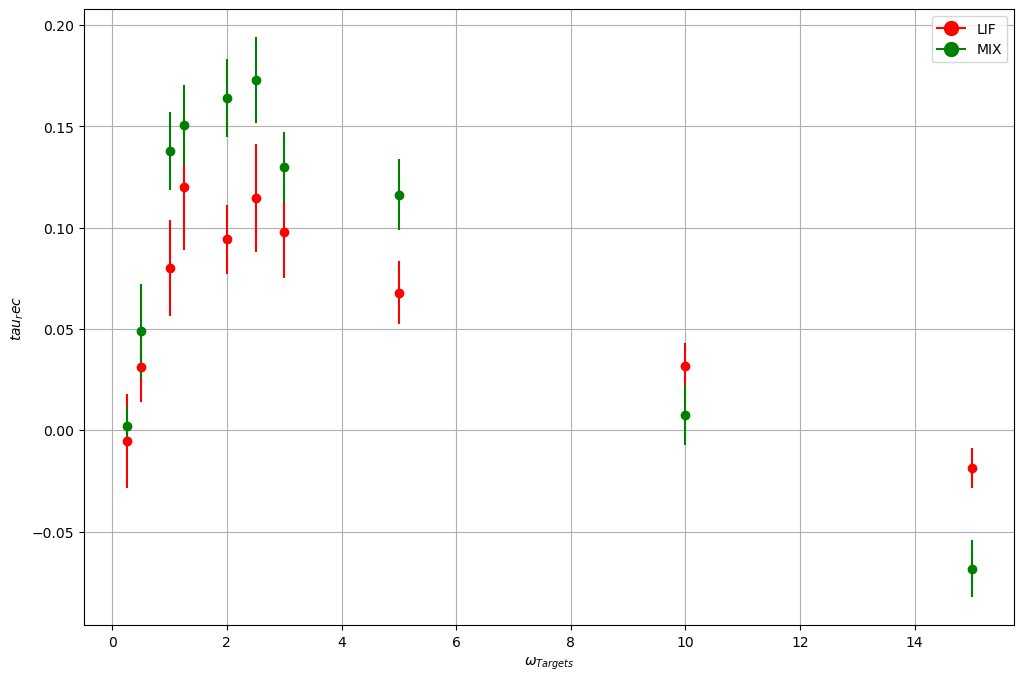

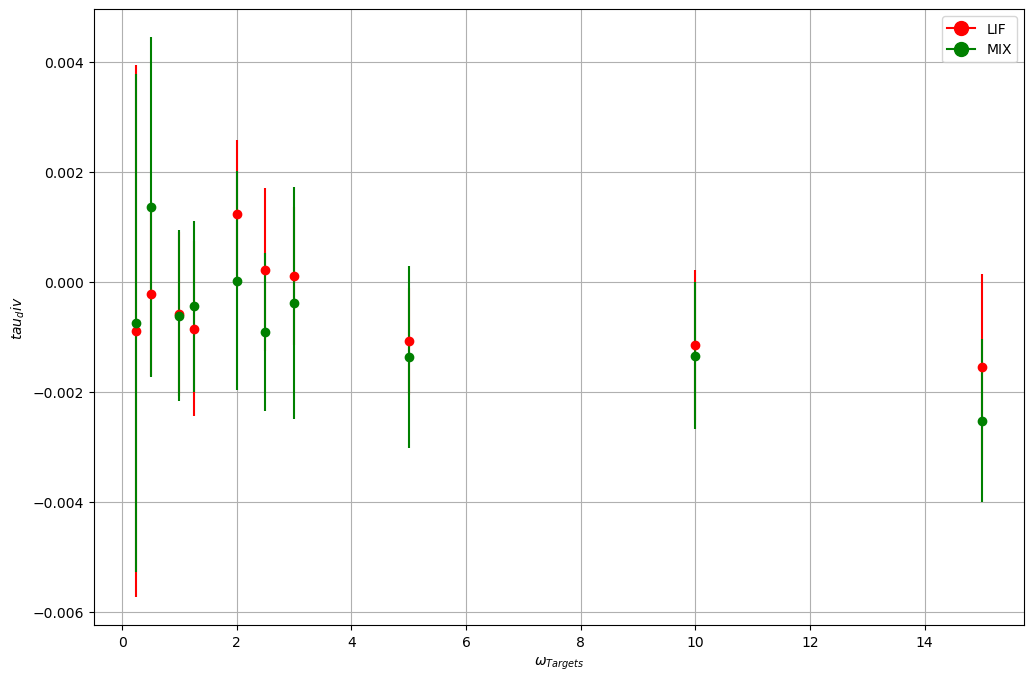

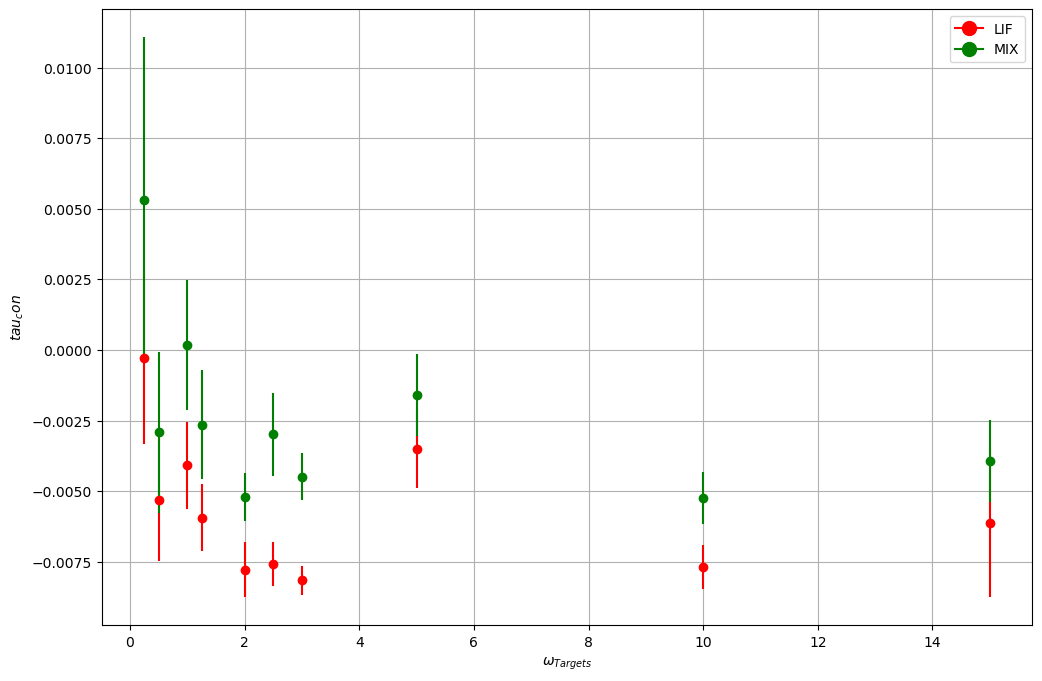

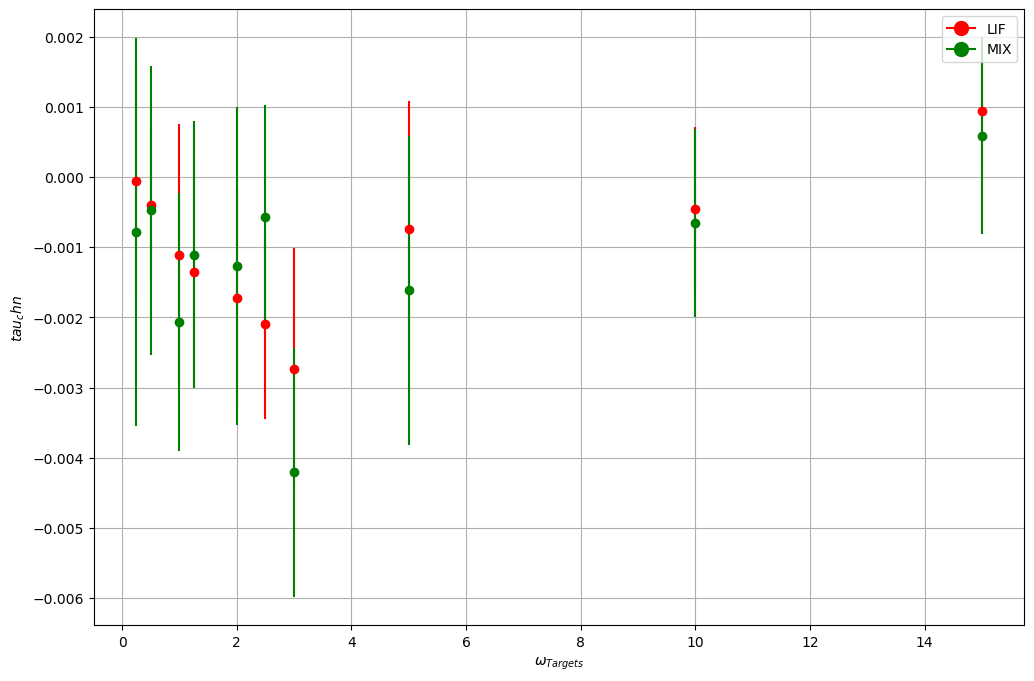

In [102]:
# Definir las frecuencias para cada simulación
frecuencias = {
    0: {'fb': 1, 'fa': 5},
    1: {'fb': 2, 'fa': 10},
    2: {'fb': 3, 'fa': 15},
    3: {'fb': 0.5, 'fa': 2.5},
    4: {'fb': 0.25, 'fa': 1.25}
}
print(frecuencias[2]['fb'])

# Definir los tipos de tau a calcular
tau_vect = ['tau_rec', 'tau_div', 'tau_con', 'tau_chn']
pqif_vector = [0, 0.5]
num_sims = [0, 1, 2, 4, 3]
# Bucle sobre los tipos de tau
for tau in tau_vect:
    # Inicializar diccionarios para almacenar los valores de tau para cada cuadrante, simulación y valor de pqif
    tau_cuadrante1 = {sim: {} for sim in range(len(num_sims))}
    tau_cuadrante4 = {sim: {} for sim in range(len(num_sims))}

    # Bucle sobre las simulaciones
    for index in range(len(num_sims)):
        num_sim = num_sims[index]
        # Leer el archivo que contiene las frecuencias de los targets de cada neurona
        nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
        frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

        # Extraer los valores únicos de frecuencia
        valores_frecuencia = frecuencias_data['romega'].unique()
        valores_frecuencia = sorted(valores_frecuencia)

        # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
        neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

        # Concatenar los vectores de índices de las neuronas para ambas frecuencias
        indices_frecuencia_1 = neuronas_por_frecuencia[valores_frecuencia[0]]
        indices_frecuencia_2 = neuronas_por_frecuencia[valores_frecuencia[1]]
        indices_concatenados = indices_frecuencia_1 + indices_frecuencia_2

        # Bucle sobre los valores de pqif
        for pqif, color in zip(pqif_vector, colores):

            # Inicializar listas para almacenar los valores de tau para cada semilla
            tau_list_cuadrante1 = []
            tau_list_cuadrante4 = []

            # Bucle sobre las semillas
            for k in range(cant_seed):
                matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')

                matrix = np.zeros((N, N))

                for i in range(N):
                    for j in range(N):
                        matrix[i,j] = matrix_[indices_concatenados[i], indices_concatenados[j]]

                rows, cols = matrix.shape
                mid_row, mid_col = rows // 2, cols // 2

                cuadrante1 = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
                cuadrante4 = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho

                # Calcular tau para cada cuadrante
                sigma21, tau1, tau_div1, tau_con1, tau_chn1 = motifs(cuadrante1, N/2)
                sigma24, tau4, tau_div4, tau_con4, tau_chn4 = motifs(cuadrante4, N/2)

                # Guardar los valores de tau según la opción tau que se está iterando
                if tau == 'tau_rec':
                    tau_list_cuadrante1.append(tau1)
                    tau_list_cuadrante4.append(tau4)
                elif tau == 'tau_div':
                    tau_list_cuadrante1.append(tau_div1)
                    tau_list_cuadrante4.append(tau_div4)
                elif tau == 'tau_con':
                    tau_list_cuadrante1.append(tau_con1)
                    tau_list_cuadrante4.append(tau_con4)
                elif tau == 'tau_chn':
                    tau_list_cuadrante1.append(tau_chn1)
                    tau_list_cuadrante4.append(tau_chn4)
                
            # Guardar los valores de tau para cada valor de pqif
            tau_cuadrante1[index][pqif] = tau_list_cuadrante1
            tau_cuadrante4[index][pqif] = tau_list_cuadrante4

    # Calcular la media y la desviación estándar para cada cuadrante, simulación y valor de pqif
    media_tau_cuadrante1 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    std_tau_cuadrante1 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    media_tau_cuadrante4 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}
    std_tau_cuadrante4 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}

    # Graficar la media de tau para cada cuadrante en función de las frecuencias asociadas
    plt.figure(figsize=(12, 8))

    for index_ in range(len(num_sims)):
        for pqif, color in zip(pqif_vector, colores):

            plt.errorbar(frecuencias[index_]['fb'], media_tau_cuadrante1[index_][pqif], yerr=std_tau_cuadrante1[index_][pqif], fmt='o', color=color, label=f'Simulación {index_ + 1}, Cuadrante 1, pqif={pqif}')
            plt.errorbar(frecuencias[index_]['fa'], media_tau_cuadrante4[index_][pqif], yerr=std_tau_cuadrante4[index_][pqif], fmt='o', color=color, label=f'Simulación {index_ + 1}, Cuadrante 4, pqif={pqif}')

    plt.xlabel(r'$\omega_{Targets}$')
    plt.ylabel(f'${tau}$')

    plt.grid(True)

    # Crear leyenda personalizada para los símbolos con etiquetas asociadas a cada pqif
    legend_labels = []
    for pqif in pqif_vector:
        label = ''
        if pqif == 0:
            label = 'LIF'
        elif pqif == 0.5:
            label = 'MIX'
        elif pqif == 1:
            label = 'QIF'
        legend_labels.append(plt.Line2D([0], [0], marker='o', color=colores[pqif_vector.index(pqif)], label=f'{label}', markersize=10))

    plt.legend(handles=legend_labels, loc='upper right')

    plt.show()


100 len
100 len
100 len
100 len
100 len
100 len
100 len
100 len


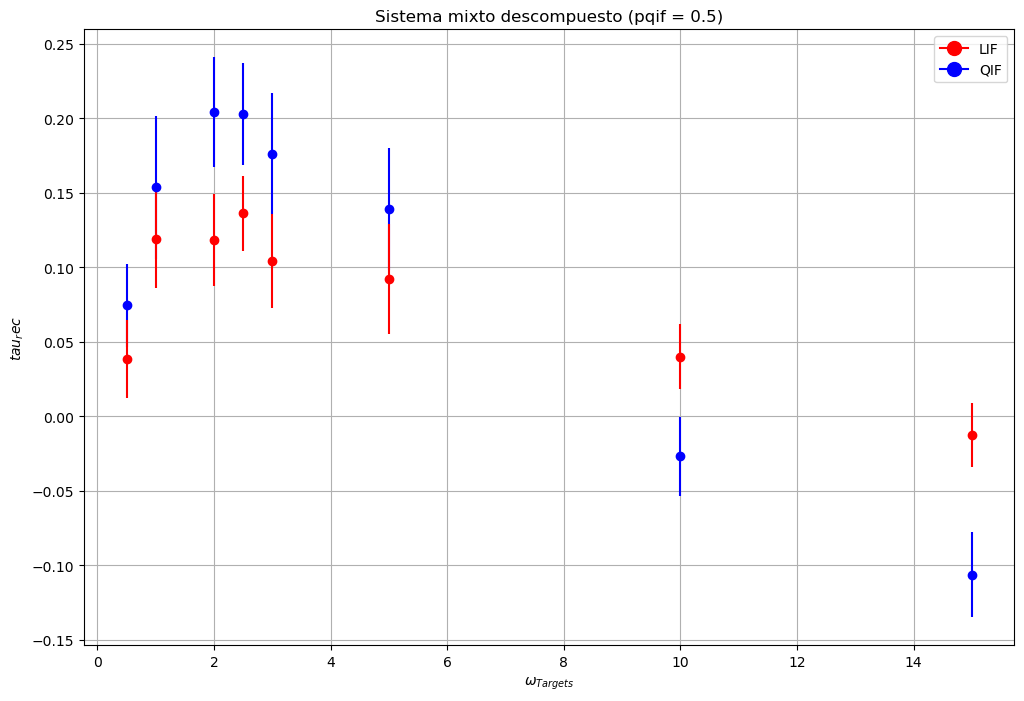

In [94]:
# Definir las frecuencias para cada simulación
frecuencias = {
    0: {'fb': 1, 'fa': 5},
    1: {'fb': 2, 'fa': 10},
    2: {'fb': 3, 'fa': 15},
    3: {'fb': 0.5, 'fa': 2.5},
}


num_sims = [0,1,2,4]

tau = 'tau_rec'
pqif_vector = [0.5]


plt.figure(figsize=(12, 8))

for index_frec in [0,1]:
    tau_cuadrante1 = {sim: {} for sim in range(len(num_sims))}
    tau_cuadrante4 = {sim: {} for sim in range(len(num_sims))}

    # Bucle sobre las simulaciones
    for index in range(len(num_sims)):
        num_sim = num_sims[index]
        # Leer el archivo que contiene las frecuencias de los targets de cada neurona
        nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
        frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

        # Extraer los valores únicos de frecuencia
        valores_frecuencia = frecuencias_data['romega'].unique()
        valores_frecuencia = sorted(valores_frecuencia)

        # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
        neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

        # Concatenar los vectores de índices de las neuronas para ambas frecuencias
        indices_frecuencia = neuronas_por_frecuencia[valores_frecuencia[index_frec]]


        indices_frecuencia_QIF = []
        indices_frecuencia_LIF = []

        
        print(len(indices_frecuencia_1), 'len')
        
        for m in range(len(indices_frecuencia)):
            if(indices_frecuencia[m] <= N/2):
                indices_frecuencia_QIF.append(indices_frecuencia[m])
            else:
                indices_frecuencia_LIF.append(indices_frecuencia[m])

        indices_concatenados = indices_frecuencia_QIF + indices_frecuencia_LIF

        # Bucle sobre los valores de pqif
        for pqif, color in zip(pqif_vector, colores):

            # Inicializar listas para almacenar los valores de tau para cada semilla
            tau_list_cuadrante1 = []
            tau_list_cuadrante4 = []

            # Bucle sobre las semillas
            for k in range(cant_seed):
                matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')
                N2 = int(N/2)
                
                matrix = np.zeros((N2, N2))

                for i in range(N2):
                    for j in range(N2):
                        matrix[i,j] = matrix_[indices_concatenados[i], indices_concatenados[j]]

                rows, cols = matrix.shape
                mid_row, mid_col = rows // 2, cols // 2

                cuadrante1 = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
                cuadrante4 = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho

                # Calcular tau para cada cuadrante
                sigma21, tau1, tau_div1, tau_con1, tau_chn1 = motifs(cuadrante1, N2/2)
                sigma24, tau4, tau_div4, tau_con4, tau_chn4 = motifs(cuadrante4, N2/2)

                # Guardar los valores de tau según la opción tau que se está iterando
                if tau == 'tau_rec':
                    tau_list_cuadrante1.append(tau1)
                    tau_list_cuadrante4.append(tau4)
                elif tau == 'tau_div':
                    tau_list_cuadrante1.append(tau_div1)
                    tau_list_cuadrante4.append(tau_div4)
                elif tau == 'tau_con':
                    tau_list_cuadrante1.append(tau_con1)
                    tau_list_cuadrante4.append(tau_con4)
                elif tau == 'tau_chn':
                    tau_list_cuadrante1.append(tau_chn1)
                    tau_list_cuadrante4.append(tau_chn4)
                
            # Guardar los valores de tau para cada valor de pqif
            tau_cuadrante1[index][pqif] = tau_list_cuadrante1
            tau_cuadrante4[index][pqif] = tau_list_cuadrante4

    # Calcular la media y la desviación estándar para cada cuadrante, simulación y valor de pqif
    media_tau_cuadrante1 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    std_tau_cuadrante1 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    media_tau_cuadrante4 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}
    std_tau_cuadrante4 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}


    f = ['fb', 'fa']
    for index_ in range(len(num_sims)):

        plt.errorbar(frecuencias[index_][f[index_frec]], media_tau_cuadrante1[index_][pqif], yerr=std_tau_cuadrante1[index_][pqif], fmt='o', color=colores[2], label=f'Simulación {index_ + 1}, Cuadrante 1')
        plt.errorbar(frecuencias[index_][f[index_frec]], media_tau_cuadrante4[index_][pqif], yerr=std_tau_cuadrante4[index_][pqif], fmt='o', color=colores[0], label=f'Simulación {index_ + 1}, Cuadrante 4, pqif={pqif}')

    plt.xlabel(r'$\omega_{Targets}$')
    plt.ylabel(f'${tau}$')

    plt.grid(True)

# Crear leyenda personalizada para los símbolos con etiquetas asociadas a cada pqif
legend_labels = []
colors = ['r', 'b']
pqif_aux = [0,1]
for pqif in pqif_aux:
    label = ''
    if pqif == 0:
        label = 'LIF'
    elif pqif == 1:
        label = 'QIF'
    legend_labels.append(plt.Line2D([0], [0], marker='o', color=colors[pqif_aux.index(pqif)], label=f'{label}', markersize=10))

plt.legend(handles=legend_labels, loc='upper right')

plt.title('Sistema mixto descompuesto (pqif = 0.5)')

plt.show()